In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 250)
pd.set_option('display.max_rows', 1000)

In [5]:
seasons = [2015, 2016, 2017, 2018, 2019]

In [7]:
coop_lst = []
url = 'https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_'
for season in seasons:
    print(f'Reading in Play-By-Play data for the {season} season')
    season_pbp = pd.read_csv(f'{url}{season}.csv')
    coop_pbp = season_pbp.loc[season_pbp.receiver_player_id == '00-0031544']
    coop_lst.append(coop_pbp)
    
coop_df = pd.concat(coop_lst).reset_index(drop=True)

Reading in Play-By-Play data for the 2015 season
Reading in Play-By-Play data for the 2016 season
Reading in Play-By-Play data for the 2017 season
Reading in Play-By-Play data for the 2018 season
Reading in Play-By-Play data for the 2019 season


In [ ]:
#dal_pbp_df.loc[dal_pbp_df.receiver_player_name == 'A.Cooper'].receiver_player_id.value_counts()

In [9]:
coop_df['game_date'] = pd.to_datetime(coop_df['game_date'])

In [ ]:
dal_pbp_df.sort_values('game_date')

In [ ]:
coop_df = dal_pbp_df.loc[(dal_pbp_df.play_type == 'pass') &
                         ( dal_pbp_df.receiver_player_id == '00-0031544')].reset_index(drop=True)

In [ ]:
coop_df.sort_values('game_date')

In [15]:
coop_df['month'] = coop_df.game_date.dt.month


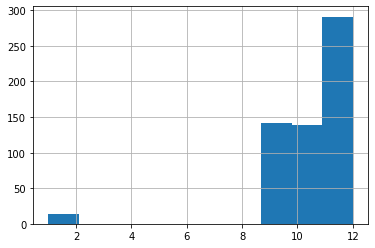

In [16]:
coop_df.groupby['month']['']

In [31]:
yards_in_a_month = coop_df.groupby(['month'], as_index = False)['yards_gained'].sum()

In [56]:
team_yards_in_a_month = coop_df.groupby(['month', 'posteam'], as_index = False)['yards_gained'].sum() \
    .sort_values(['month', 'posteam'])

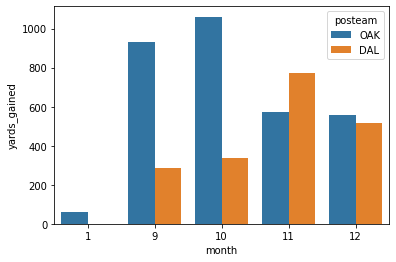

In [57]:
sns.barplot(x= 'month', y = 'yards_gained', data=team_yards_in_a_month, hue='posteam')

In [58]:
team_games_in_a_month = coop_df.groupby(['month', 'posteam'], as_index=False)['game_id'] \
    .agg({'games': pd.Series.nunique}) \
    .sort_values(['month', 'posteam'])

In [61]:
graph_df = team_yards_in_a_month.merge(team_games_in_a_month, on = ['month', 'posteam'])

In [63]:
graph_df['yards_per_game'] = graph_df['yards_gained'] / graph_df['games']

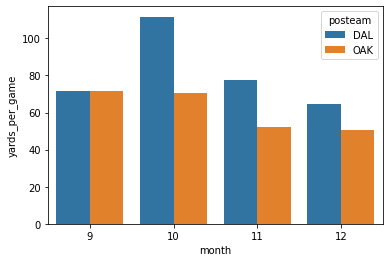

In [65]:
sns.barplot(x='month', y='yards_per_game', hue='posteam', data=graph_df.loc[graph_df.month != 1])

In [67]:
import calmap

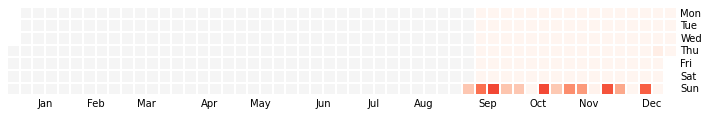

In [98]:
plt.figure(figsize=(12,18))
calmap.yearplot(coop_df.groupby('game_date')['yards_gained'].sum())

In [102]:
coop_df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,...,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,pass_defense_1_player_id,pass_defense_1_player_name,pass_defense_2_player_id,pass_defense_2_player_name,

In [110]:
team_yards_in_a_qtr = coop_df.groupby(['qtr', 'posteam', 'month'], as_index = False)['yards_gained'].sum() \
    .sort_values(['qtr', 'posteam'])

In [112]:
team_yards_in_a_qtr.head()

,qtr,posteam,month,yards_gained
0,1,DAL,9,76
1,1,DAL,10,84
2,1,DAL,11,146
3,1,DAL,12,30
4,1,OAK,1,6


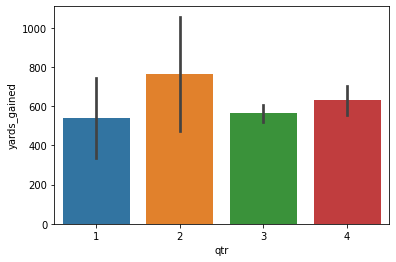

In [109]:
# sns.barplot(x='qtr', y='yards_gained', data=team_yards_in_a_qtr.loc[team_yards_in_a_qtr.qtr != 5], #hue='posteam'
#            )

In [120]:
# g = sns.FacetGrid(team_yards_in_a_qtr, col="qtr", col_wrap=2, height=1.5)
# g = g.map(plt.hist, "month", "yards_gained", marker=".")

In [123]:
for c in coop_df.columns:
    print(c)

play_id
game_id
home_team
away_team
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa
total_away_rush_epa
total_home_pass_epa
total_away_pass_e

In [127]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [133]:
url = 'http://www.nflweather.com/en/week/'
season = '2019'
week = '1'

In [134]:
def request_data(url):
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    
    return soup

In [140]:
soup = request_data(f'{url}{season}/week-{week}')

In [162]:
teams = soup.find_all(class_="team-name text-center")

away_teams = []
home_teams = []

for i, v in enumerate(teams):
    if i % 2 == 0:
        away_teams.append(teams[i].find('a').contents[0])
    else:
        home_teams.append(teams[i].find('a').contents[0])

In [196]:
games = soup.find_all('tr')

In [199]:
weather_lst = []
for i, v in enumerate(games):
    #skip header
    if i > 0:
        game_details = games[i].find_all(class_='text-center')
        
        forecast = game_details[5].contents[0]
        
        weather_lst.append(' '.join(forecast.split()))
        
        

In [201]:
pd.DataFrame({
    'away_tm': away_teams,
    'home_tm': home_teams,
    'forecast': weather_lst
})

,away_tm,home_tm,forecast
0,Packers,Bears,65f Clear
1,Rams,Panthers,85f Clear
2,Redskins,Eagles,79f Partly Cloudy
3,Bills,Jets,74f Partly Cloudy
4,Falcons,Vikings,DOME
5,Ravens,Dolphins,89f Humid and Mostly Cloudy
6,Chiefs,Jaguars,93f Clear
7,Titans,Browns,69f Mostly Cloudy
8,Colts,Chargers,73f Clear
9,Bengals,Seahawks,66f Overcast


In [200]:
weather_lst

['65f Clear',
 '85f Clear',
 '79f Partly Cloudy',
 '74f Partly Cloudy',
 'DOME',
 '89f Humid and Mostly Cloudy',
 '93f Clear',
 '69f Mostly Cloudy',
 '73f Clear',
 '66f Overcast',
 '91f Humid and Partly Cloudy',
 '97f Clear',
 'DOME',
 '64f Partly Cloudy',
 'DOME',
 '64f Partly Cloudy']